In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [2]:
url = "https://api.open-meteo.com/v1/forecast"

param = {"latitude": 8.4855, "longitude": 76.9492, "hourly":"temperature_2m"}
head = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0"}

In [3]:
data = requests.get(url, params=param, headers = head)

In [4]:
output = data.json()

In [5]:
output

{'latitude': 8.5,
 'longitude': 77.0,
 'generationtime_ms': 0.15103816986083984,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 12.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'},
 'hourly': {'time': ['2023-08-27T00:00',
   '2023-08-27T01:00',
   '2023-08-27T02:00',
   '2023-08-27T03:00',
   '2023-08-27T04:00',
   '2023-08-27T05:00',
   '2023-08-27T06:00',
   '2023-08-27T07:00',
   '2023-08-27T08:00',
   '2023-08-27T09:00',
   '2023-08-27T10:00',
   '2023-08-27T11:00',
   '2023-08-27T12:00',
   '2023-08-27T13:00',
   '2023-08-27T14:00',
   '2023-08-27T15:00',
   '2023-08-27T16:00',
   '2023-08-27T17:00',
   '2023-08-27T18:00',
   '2023-08-27T19:00',
   '2023-08-27T20:00',
   '2023-08-27T21:00',
   '2023-08-27T22:00',
   '2023-08-27T23:00',
   '2023-08-28T00:00',
   '2023-08-28T01:00',
   '2023-08-28T02:00',
   '2023-08-28T03:00',
   '2023-08-28T04:00',
   '2023-08-28T05:00',
   '2023-08-28T06:00',
   '2023-08-28T07:00',
   '

In [6]:
df = pd.DataFrame(data={"time":output['hourly']['time'],
                       "temperature":output['hourly']['temperature_2m']})

<Axes: >

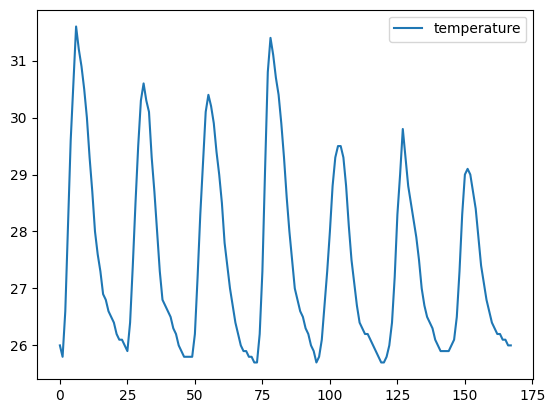

In [7]:
df.plot()

In [8]:
df

,time,temperature
0,2023-08-27T00:00,26.0
1,2023-08-27T01:00,25.8
2,2023-08-27T02:00,26.6
3,2023-08-27T03:00,28.1
4,2023-08-27T04:00,29.6
...,...,...
163,2023-09-02T19:00,26.2
164,2023-09-02T20:00,26.1
165,2023-09-02T21:00,26.1
166,2023-09-02T22:00,26.0



## HTML File structure
```
├── html
│   ├── head
│   │   ├── title
│   ├── body
│       ├── table
│           ├── row
│           |   ├── head
│           ├── row
│           |   ├── column
│           ├── row
│           |   ├── column
│           ├── row
│           |   ├── column
│           ├── row
│               ├── column
```

In [9]:
with open('index.html','r') as f:
    content = f.read()

In [10]:
soup = BeautifulSoup(content, 'html.parser')
rows = soup.find_all("tr")

In [12]:
title = soup.find_all('th')
head_data = [k.text for k in title]

In [13]:
river_data = []
for n, i in enumerate(rows):
    cols = i.find_all('td')
    col_data = [j.text for j in cols]
    if col_data:
        river_data.append(col_data)
    

In [14]:
river_data

[['Kaveri',
  '765',
  'Talakaveri in the Western Ghats in Karnataka',
  'Ends in the Bay of Bengal'],
 ['Krishna',
  '1400',
  'Originates in the Western Ghats near Mahabaleshwar in Maharashtra',
  'Ends in the Bay of Bengal near Andhra Pradesh'],
 ['Godavari',
  '1465',
  'Starts in Maharashtra and passes through 7 Indian states',
  'Empties in the Bay of Bengal'],
 ['Tungabhadra',
  '531',
  'Tributary of Krishna river staring at Karnataka',
  'Joins Krishna river along the border of Telangana and Andhra Prades']]

In [16]:
df2 = pd.DataFrame(river_data, columns= head_data)

In [17]:
df2

,Rivers,Length (KM),Origin,End
0,Kaveri,765,Talakaveri in the Western Ghats in Karnataka,Ends in the Bay of Bengal
1,Krishna,1400,Originates in the Western Ghats near Mahabales...,Ends in the Bay of Bengal near Andhra Pradesh
2,Godavari,1465,Starts in Maharashtra and passes through 7 Ind...,Empties in the Bay of Bengal
3,Tungabhadra,531,Tributary of Krishna river staring at Karnataka,Joins Krishna river along the border of Telang...


In [18]:
upsc_url = "https://www.upscsuccess.com/rivers-india/"
head = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0"}

riv_page = requests.get(upsc_url, headers = head)
soup2 = BeautifulSoup(riv_page.content)

In [22]:
fig = soup2.find('figure', attrs={'class':'wp-block-table'})

In [23]:
table = fig.find('table')

In [24]:
rows = table.find_all("tr")
title = table.find_all('th')
head_data = [k.text for k in title]

river_data = []
for n, i in enumerate(rows):
    cols = i.find_all('td')
    col_data = [j.text for j in cols]
    if col_data:
        river_data.append(col_data)

In [25]:
df3 = pd.DataFrame(river_data, columns= head_data)

In [26]:
df3

,Sl. No.,River,Length (km),Origin,End
0,1.,Indus,"2,900","Originates in Tibetan plateau, Enters India i...",Merges into Arabian sea near Sindh
1,2.,Brahmaputra,"2,900","Himalayan Glacier in Tibet, but enters India ...",Merges with Ganga and ends in the Bay of Bengal
2,3.,Ganga,"2,510","Gangotri Glacier (Bhagirathi), Uttarakhand",Bay of Bengal
3,4.,Godavari,"1,450",Starts in Maharashtra and passes through 7 In...,Empties in the Bay of Bengal
4,5.,Narmada,"1,290","Starts from Amarkantak, Madhya Pradesh",Drains into Arabian sea via Gulf of Cambay
5,6.,Krishna,"1,290",Originates in the Western Ghats near Mahabale...,Ends in the Bay of Bengal near Andhra Pradesh
6,7.,Mahanadi,890,"Originates from Dhamtri, Chhattisgarh",Ends in the Bay of Bengal in Odisha
7,8.,Kaveri,760,Talakaveri in the Western Ghats in Karnataka,Ends in the Bay of Bengal
